<a href="https://colab.research.google.com/github/zkinard/CS-4410-Intro-to-Machine-Learning/blob/main/KinardWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

In [53]:
#Import Iris Data
from sklearn.datasets import load_iris

In [54]:
#Save Iris data
iris_dataset = load_iris()

In [55]:
#Hyperparameter tuning
scores = {}
for k in range(1,31):
  knn = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn, X=iris_dataset.data, y=iris_dataset.target, cv=10)
  #print(f'k={k:<2}; mean accuracy = {scores.mean():.2%}; ' +
   #   f'standard deviaton={scores.std():.2%}')
  scores[k] = score.mean()


{1: 0.96, 2: 0.9533333333333334, 3: 0.9666666666666666, 4: 0.9666666666666666, 5: 0.9666666666666668, 6: 0.9666666666666668, 7: 0.9666666666666668, 8: 0.9666666666666668, 9: 0.9733333333333334, 10: 0.9666666666666668, 11: 0.9666666666666668, 12: 0.9733333333333334, 13: 0.9800000000000001, 14: 0.9733333333333334, 15: 0.9733333333333334, 16: 0.9733333333333334, 17: 0.9733333333333334, 18: 0.9800000000000001, 19: 0.9733333333333334, 20: 0.9800000000000001, 21: 0.9666666666666666, 22: 0.9666666666666666, 23: 0.9733333333333334, 24: 0.96, 25: 0.9666666666666666, 26: 0.96, 27: 0.9666666666666666, 28: 0.9533333333333334, 29: 0.9533333333333334, 30: 0.9533333333333334}


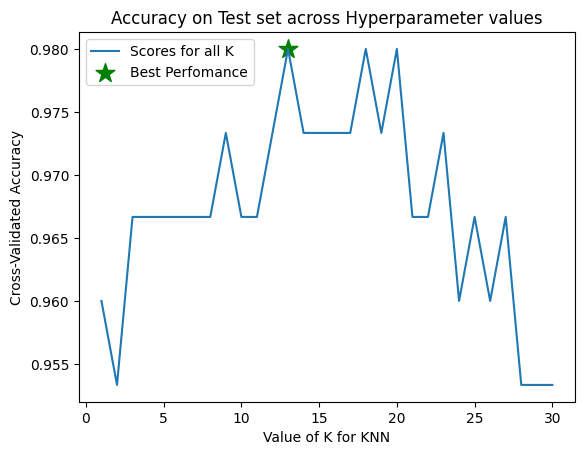

Top score of optimal classifier: 0.9800000000000001
Best Value of N to use 13


In [57]:
# Printing the results
plt.title("Accuracy on Test set across Hyperparameter values")
print(scores)
plt.plot(list(scores.keys()), list(scores.values()), label = 'Scores for all K')
top_score = max(scores.values())
best_k = list(scores.keys())[list(scores.values()).index(top_score)]
plt.scatter([best_k], [top_score], color = 'g', marker = '*', s = 200, label = 'Best Perfomance')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.legend()
plt.show()


print("Top score of optimal classifier: " + str(top_score))
print("Best Value of N to use " + str(best_k))

In [58]:
#Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [59]:
#Use GridSearchCV to confirm k=13 has the optimal parameter.
ks=list(range(1,100,2))
param_grid = dict(n_neighbors=ks)

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=10)

grid_search = grid.fit(iris_dataset.data, iris_dataset.target)

print(grid_search.cv_results_['mean_test_score'])

print(grid_search.best_params_)

[0.96       0.96666667 0.96666667 0.96666667 0.97333333 0.96666667
 0.98       0.97333333 0.97333333 0.97333333 0.96666667 0.97333333
 0.96666667 0.96666667 0.95333333 0.94666667 0.94666667 0.94666667
 0.94666667 0.95333333 0.95333333 0.94666667 0.93333333 0.93333333
 0.94       0.94       0.93333333 0.93333333 0.92       0.92
 0.92       0.90666667 0.9        0.88666667 0.88       0.88666667
 0.89333333 0.88       0.88666667 0.88666667 0.88666667 0.88
 0.87333333 0.87333333 0.88       0.66       0.66       0.66
 0.66       0.66      ]
{'n_neighbors': 13}
